ANALYSIS:

Capomulin showed the a decrease in tumor volume, unlike Infubinol and Ketapril, which proved as ineffective as the Placebo. 

As expected from the decrease in tumor volume, the survival rate for Capomulin was much higher than Infubinol, Ketapril, and Placebo.  

Capomulin and Ramicane where to only two drugs which proved effective in reducing tumor volume along with higher survival rates. 

In [1]:
# Dependencies and Setup
%matplotlib inline
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as st
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
df = pd.merge(mouse_df, clinical_df, how='left', on=['Mouse ID', 'Mouse ID'])
# Display the data table for preview
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


# Tumor Response to Treatment

In [2]:
#Tumor Response to Treatment
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
means = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index(drop=False)
#means.drop('Metastatic Sites', axis=1, inplace=True)
means.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index(drop=False)
standard_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
means_vol = means.pivot(index='Timepoint', columns='Drug')
error_vol = standard_error.pivot(index='Timepoint', columns='Drug')
means_vol.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

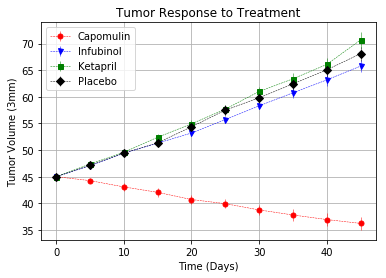

In [19]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
Capomulin = ax.errorbar(means_vol.index, means_vol.iloc[:,0], yerr=error_vol.iloc[:,0], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
Infubinol = ax.errorbar(means_vol.index, means_vol.iloc[:,2], yerr=error_vol.iloc[:,2], color="b", marker="v", markersize=5, linestyle="dashed", linewidth=0.50)
Ketapril = ax.errorbar(means_vol.index, means_vol.iloc[:,3], yerr=error_vol.iloc[:,3], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
Placebo = ax.errorbar(means_vol.index, means_vol.iloc[:,5], yerr=error_vol.iloc[:,5], color="k", marker="D", markersize=5, linestyle="dashed", linewidth=0.50)
ax.set_title('Tumor Response to Treatment')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Tumor Volume (3mm)')
ax.grid()
ax.legend(['Capomulin','Infubinol', 'Ketapril', 'Placebo'])
plt.savefig('Tumor Response to Treatment')
plt.show()

# Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean_stat = df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean().reset_index(drop=False)
# Convert to DataFrame
met_mean_stat.head()
# Preview DataFrame

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_std_err = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index(drop=False)
# Convert to DataFrame
met_std_err.head()
# Preview DataFrame

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
met_mean_pivot = met_mean_stat.pivot(index='Timepoint', columns='Drug')
met_stderr_pivot = met_std_err.pivot(index='Timepoint', columns='Drug')
# Preview that Reformatting worked
#met_stderr_pivot.head()
met_mean_pivot.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

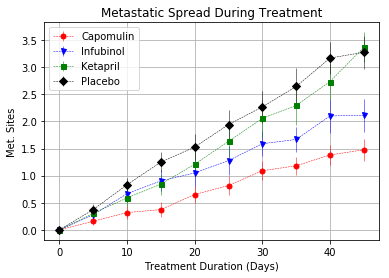

In [18]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
Capomulin = ax.errorbar(met_mean_pivot.index, met_mean_pivot.iloc[:,0], yerr=met_stderr_pivot.iloc[:,0], color='r', marker='o', markersize=5, linestyle="dashed", linewidth=0.50)
Infubinol = ax.errorbar(met_mean_pivot.index, met_mean_pivot.iloc[:,2], yerr=met_stderr_pivot.iloc[:,2], color='b', marker='v', markersize=5, linestyle="dashed", linewidth=0.50)
Ketapril = ax.errorbar(met_mean_pivot.index, met_mean_pivot.iloc[:,3], yerr=met_stderr_pivot.iloc[:,3], color='g', marker='s', markersize=5, linestyle="dashed", linewidth=0.50)
Placebo = ax.errorbar(met_mean_pivot.index, met_mean_pivot.iloc[:,5], yerr=met_stderr_pivot.iloc[:,5], color='k', marker='D', markersize=5, linestyle="dashed", linewidth=0.50)
ax.set_title('Metastatic Spread During Treatment')
ax.set_xlabel('Treatment Duration (Days)')
ax.set_ylabel('Met. Sites')
ax.grid()
ax.legend(['Capomulin','Infubinol', 'Ketapril', 'Placebo'])
# Save the Figure
plt.savefig('Metastatic Spread During Treatment')
# Show the Figure
plt.show()

# Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
m_count = df.groupby(['Drug', 'Timepoint']).count().reset_index(drop=False)
m_count.drop(['Metastatic Sites','Tumor Volume (mm3)'], axis=1, inplace=True)
mice_count = m_count.rename(columns={'Mouse ID':'Mouse Count'})
mice_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_rf = mice_count.pivot(index='Timepoint', columns='Drug')
# Preview the Data Frame
mice_count_rf.tail()

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
25                 22       18        18       19       18      17       14   
30                 22       16        17       18       15      15       13   
35                 22       14        12       17       15      14       10   
40                 21       14        10       15       15      12        9   
45                 21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

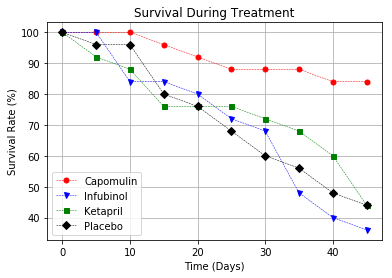

In [17]:
# Generate the Plot (Accounting for percentages)
pecent_mice_count = mice_count_rf.div(mice_count_rf.iloc[0])*100
fig, ax = plt.subplots()
Capomulin = ax.plot(pecent_mice_count.index, pecent_mice_count.iloc[:,0], color='r', marker='o', markersize=5, linestyle="dashed", linewidth=0.50)
Infubinol = ax.plot(pecent_mice_count.index, pecent_mice_count.iloc[:,2], color='b', marker='v', markersize=5, linestyle="dashed", linewidth=0.50)
Ketapril = ax.plot(pecent_mice_count.index, pecent_mice_count.iloc[:,3], color='g', marker='s', markersize=5, linestyle="dashed", linewidth=0.50)
Placebo = ax.plot(pecent_mice_count.index, pecent_mice_count.iloc[:,5], color='k', marker='D', markersize=5, linestyle="dashed", linewidth=0.50)
ax.legend(['Capomulin','Infubinol', 'Ketapril', 'Placebo'])
ax.grid()
ax.set_title('Survival During Treatment')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Survival Rate (%)')
# Save the Figure
plt.savefig('Survival During Treatment')
# Show the Figure
plt.show()

# Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
drug_pct_change = ((means_vol.iloc[-1] - means_vol.iloc[0])/means_vol.iloc[0]) * 100
drug_pct_change = drug_pct_change.reset_index(drop=False)
drug_pct_change.drop('level_0', axis=1, inplace=True)
drug_pct_change = drug_pct_change.rename(columns={0:'Percent_Change'})
drug_pct_change

,Drug,Percent_Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [14]:
df1 = drug_pct_change[(drug_pct_change['Drug'] == 'Capomulin') | (drug_pct_change['Drug'] == 'Infubinol') | (drug_pct_change['Drug'] == 'Ketapril') | 
                       (drug_pct_change['Drug'] == 'Placebo')].reset_index(drop=True)

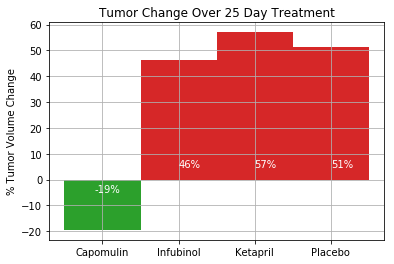

In [16]:
fig, ax = plt.subplots()
ax.bar(df1['Drug'], df1['Percent_Change'], width=1, color=['C2','C3','C3','C3'])
x_axis = np.arange(len(df1['Drug']))
plt.title('Tumor Change Over 25 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.text(-.1,-5,str(int(df1['Percent_Change'][0]))+"%", color='w')
plt.text(1.0,5,str(int(df1['Percent_Change'][1]))+"%", color='w')
plt.text(2.0,5,str(int(df1['Percent_Change'][2]))+"%", color='w')
plt.text(3.0,5,str(int(df1['Percent_Change'][3]))+"%", color='w')
plt.grid()
plt.savefig('Tumor Change Over 25 Day Treatment')
plt.show()